<h1> Importing Libraries </h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as py
import seaborn as sns
import pickle
import string
import re
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h1> Reading and Understanding the Data </h1>

In [2]:
data_frame = pd.read_csv("car_price_dataset.csv",encoding='utf-8')

In [3]:
data_frame.head()

,ID,maker model,manufacture_year,fuel_type,price_eur
0,1,ford galaxy,2011,diesel,10584.75
1,1,ford galaxy,2012,diesel,11102.89
2,1,ford galaxy,1998,gasoline,740.19
3,2,skoda octavia,2012,diesel,8882.31
4,2,skoda octavia,2003,diesel,4293.12


In [4]:
data_frame.count()

ID                  453878
maker model         453878
manufacture_year    453878
fuel_type           453878
price_eur           453878
dtype: int64

In [5]:
data_frame.describe()

,ID,manufacture_year,price_eur
count,453878.000000,453878.000000,4.538780e+05
mean,138.953042,2008.560745,1.526181e+04
std,113.568120,6.241457,7.223304e+05
min,1.000000,1960.000000,5.550300e+02
25%,55.000000,2005.000000,3.701370e+03
50%,99.000000,2010.000000,8.871320e+03
75%,186.000000,2014.000000,1.595859e+04
max,670.000000,2016.000000,3.404523e+08


In [6]:
data_frame = data_frame.rename({"maker model" : "maker_model"},axis='columns')

In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453878 entries, 0 to 453877
Data columns (total 5 columns):
ID                  453878 non-null int64
maker_model         453878 non-null object
manufacture_year    453878 non-null int64
fuel_type           453878 non-null object
price_eur           453878 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 17.3+ MB


<h1> Data Cleanning and Preprocessing </h1>

In [8]:
data_frame['price_eur'] = round(data_frame['price_eur'],0)

In [9]:
data_frame['price_eur'] = data_frame['price_eur'].astype(int)

In [10]:
data_frame.head()

,ID,maker_model,manufacture_year,fuel_type,price_eur
0,1,ford galaxy,2011,diesel,10585
1,1,ford galaxy,2012,diesel,11103
2,1,ford galaxy,1998,gasoline,740
3,2,skoda octavia,2012,diesel,8882
4,2,skoda octavia,2003,diesel,4293


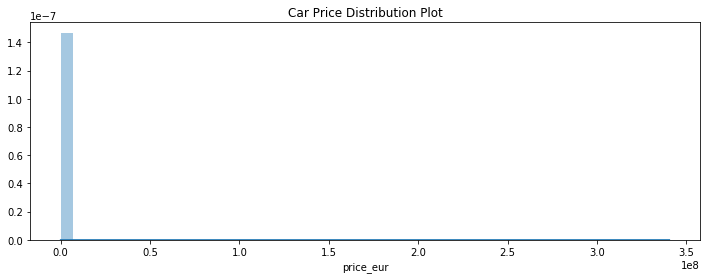

In [11]:
py.figure(figsize=(12,4))

py.subplot(1,1,1)
py.title('Car Price Distribution Plot')
sns.distplot(data_frame.price_eur)

py.show()

In [ ]:
py.figure(figsize=(20, 6))

py.subplot(1,3,1)
py = data_frame.maker_model.value_counts().plot('bar')
py.set(xlabel = 'Car company', ylabel='Frequency of maker model')

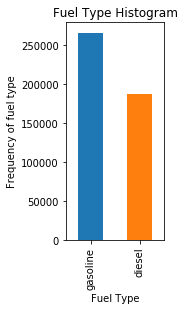

In [23]:
py.subplot(1,3,2)
py1 = data_frame.fuel_type.value_counts().plot('bar')
py.title('Fuel Type Histogram')
py1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')


py.show()

AttributeError: 'AxesSubplot' object has no attribute 'subplot'

In [13]:
data_frame['maker_model'].tail()

453873        tesla   model-x
453874        toyota   solara
453875    chrysler   concorde
453876       tesla   roadster
453877     chevrolet   cobalt
Name: maker_model, dtype: object

In [14]:
data_frame.manufacture_year.unique()

array([2011, 2012, 1998, 2003, 2009, 2006, 2005, 2007, 2010, 2008, 2004,
       2001, 2013, 2002, 1997, 2014, 2015, 1996, 2000, 1999, 1990, 1980,
       1970, 2016, 1966, 1995, 1994, 1960, 1968, 1971, 1984, 1993, 1973,
       1961, 1986, 1962, 1964, 1985, 1989, 1975, 1988, 1992, 1991, 1987,
       1963, 1967, 1983, 1982, 1979, 1981, 1977, 1978, 1965, 1972, 1969,
       1974, 1976], dtype=int64)

In [15]:
data_frame.head()

,ID,maker_model,manufacture_year,fuel_type,price_eur
0,1,ford galaxy,2011,diesel,10585
1,1,ford galaxy,2012,diesel,11103
2,1,ford galaxy,1998,gasoline,740
3,2,skoda octavia,2012,diesel,8882
4,2,skoda octavia,2003,diesel,4293


In [17]:
y = data_frame.pop('price_eur')

<h1> Train-test split </h1>

In [18]:
np.random.seed(0)

df_train,df_test,df_y_train,df_y_test = train_test_split(data_frame,y,train_size = 0.8,
                                                 test_size=0.2,random_state = 100)

In [19]:
df_train.columns

Index(['ID', 'maker_model', 'manufacture_year', 'fuel_type'], dtype='object')

<h3> Number of Training Instances After Spliting</h3>

In [19]:
df_train.count()

ID                  363102
maker_model         363102
manufacture_year    363102
fuel_type           363102
dtype: int64

<h3> Number of Testing instances after spliting </h3>

In [20]:
df_test.count()

ID                  90776
maker_model         90776
manufacture_year    90776
fuel_type           90776
dtype: int64

<h3> Converting Traning data into a form that computer can understand </h3>

In [22]:
print("Train Data Before Applying Label Encoding")

Train Data Before Applying Label Encoding


In [23]:
df_train.head()

,ID,maker_model,manufacture_year,fuel_type
376691,235,fiat 500,2014,gasoline
408058,315,dodge ram,2015,gasoline
384319,246,bmw x1,2015,diesel
69883,41,hyundai ix35,2012,diesel
143667,66,opel corsa,2009,gasoline


In [24]:
print("Train Data After Applying Label Encoding")

encode_maker_model = LabelEncoder()
encode_fuel_type = LabelEncoder()

Train Data After Applying Label Encoding


In [25]:
encode_maker_model.fit(df_train['maker_model'])
encode_fuel_type.fit(df_train['fuel_type'])

LabelEncoder()

In [26]:
df_train['maker_model'] = encode_maker_model.transform(df_train['maker_model'])

In [27]:
df_train['fuel_type'] = encode_fuel_type.transform(df_train['fuel_type'])

In [28]:
print("Data After Applying Label Encoding")

Data After Applying Label Encoding


In [29]:
df_train.head()

,ID,maker_model,manufacture_year,fuel_type
376691,235,171,2014,1
408058,315,162,2015,1
384319,246,50,2015,0
69883,41,285,2012,0
143667,66,490,2009,1


<h3> Converting Testing data into a form that can be understand by the computer </h3>

In [30]:
print("Test Data Before Applying Label Encoding")

Test Data Before Applying Label Encoding


In [31]:
df_test.head()

,ID,maker_model,manufacture_year,fuel_type
425324,370,bmw m4,2014,gasoline
329368,170,opel combo,2005,diesel
401000,279,hyundai i10,2011,gasoline
58618,37,ford focus,2001,gasoline
66535,39,skoda superb,2010,diesel


In [32]:
t_encode_maker_model = LabelEncoder()
t_encode_fuel_type = LabelEncoder()

In [33]:
t_encode_maker_model.fit(df_test['maker_model'])
t_encode_fuel_type.fit(df_test['fuel_type'])

LabelEncoder()

In [34]:
df_test['maker_model'] = t_encode_maker_model.transform(df_test['maker_model'])

In [35]:
df_test['fuel_type'] = t_encode_fuel_type.transform(df_test['fuel_type'])

In [36]:
print("Test data after Label Encoding")

Test data after Label Encoding


In [37]:
df_test.head()

,ID,maker_model,manufacture_year,fuel_type
425324,370,46,2014,1
329368,170,453,2005,0
401000,279,256,2011,1
58618,37,200,2001,1
66535,39,515,2010,0


<h1> Feature Scalling </h1>

In [38]:
sc_X = StandardScaler()

In [39]:
X_train = sc_X.fit_transform(df_train)
X_test =  sc_X.fit_transform(df_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
X_train

array([[ 0.8474854 , -0.80074676,  0.87298667,  0.839705  ],
       [ 1.55277823, -0.84474636,  1.03359534,  0.839705  ],
       [ 0.94446316, -1.39229698,  1.03359534, -1.19089442],
       ...,
       [-0.40440937, -0.70785871,  0.23055201, -1.19089442],
       [-0.89811435, -0.57585989,  0.87298667, -1.19089442],
       [ 0.05403097,  0.26991026,  0.23055201, -1.19089442]])

<h3> Now we will Train the Model </h3>

In [41]:
print("Using Multiple Linear Regression")
print("Parameters and their values")

linear_reg = LinearRegression()
linear_reg.fit(X_train,df_y_train)

Using Multiple Linear Regression
Parameters and their values


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
print("Using Linear Laso Regression")
print ("Parameters and their values")

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train,df_y_train)

Using Linear Laso Regression
Parameters and their values


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
print("Using Ridge Linear Regression")
print("paramters and their values")

ridge_reg = Ridge(alpha=.5)
ridge_reg.fit(X_train,df_y_train)

Using Ridge Linear Regression
paramters and their values


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

<h1> Evaluating Trained Model </h1>

<h3> Evaluating Linear Regression on Test Data </h3>

In [44]:
# we will be using the r2 score metric to chweck the accuracy of our trained model
linear_reg_predict = linear_reg.predict(X_test)

In [45]:
r2_score(df_y_test,linear_reg_predict)

1.779992415407161e-05

In [46]:
lasso_reg_predict = lasso_reg.predict(X_test)

In [47]:
r2_score(df_y_test,lasso_reg_predict)

1.780094795211795e-05

In [48]:
ridge_reg_predict = ridge_reg.predict(X_test)

In [49]:
r2_score(df_y_test,ridge_reg_predict)

1.7799934936113537e-05